# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Dimas Bima Aditya
- **Email:** paywastaras20@gmail.com
- **ID Dicoding:** Dimas Bima Aditya

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Apakah ada perbedaan signifikan dari jumlah pengguna sepeda antara hari kerja (senin - jumat) dan akhir pekan (sabtu - minggu)? (visualisasi boxplot dan bar chart)

- Pertanyaan 2 : Bagaimana pengaruh kondisi cuaca terhadap jumlah pengguna sepeda per hari dalam seminggu? (visualisasi bar chart dan line chart)

- Pertanyaan 3 : Pada saat jam berapa kondisi pemakaian sepeda paling tinggi setiap harinya?(Visualisasi bar chart dan line chart)

## Import Semua Packages/Library yang Digunakan

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [91]:
#DATA SET DAY
day_df = pd.read_csv('day.csv')
day_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [92]:
#DATA SET HOUR
hour_df = pd.read_csv('hour.csv')
hour_df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


### Assessing Data

In [93]:
#CEK MISSING VALUE DAN DUPLICATED VALUE PADA DATASET DAY
day_df.info()
print("missing value")
print(day_df.isna().sum())
print("duplicated value")
print(day_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
missing value
instant       0
dteday        0
season        0
yr            0
mnth          0

**TERLIHAT BAHWA DATA SET DAY TIDAK MEMILIKI MISSING VALUE DAN DUPLICATED DATA**

In [94]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**TERLIHAT PERSEBARAN DATA YANG CUKUP BAGUS DAN TIDAK ADA KEJANGGALAN**

TIPE DATA
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object
NILAI UNIK
instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64
CEK BOXPLOT


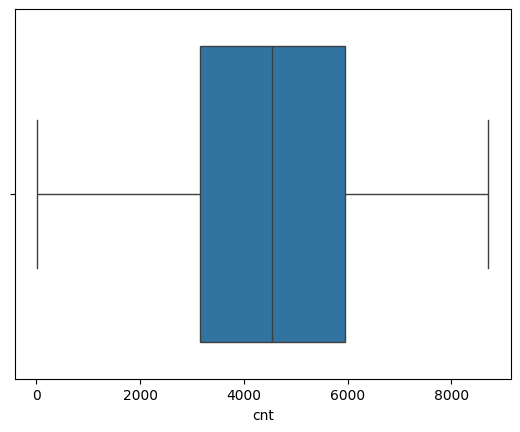

CEK DATA
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [95]:
# CEK TIPE TIAP DATA
print("TIPE DATA")
print(day_df.dtypes)

# CEK NILAI UNIK
print("NILAI UNIK")
print(day_df.nunique())

# CEK OUTLIER DENGAN BOXPLOT
print("CEK BOXPLOT")
sns.boxplot(x=day_df['cnt'])
plt.show()

# CEK APAKAH ADA INVALID DATA
print("CEK DATA")
invalid_data = day_df.query('cnt < 0')
print(invalid_data)

TIDAK TERDAPAT INVALID DATA, OUTLIER DAN KEJANGGALAN PADA NILAI UNIK NAMUN TERDAPAT KEANEHAN PADA TIPE DATA **dteday** SEHARUSNYA BERTIPE DATA **datetime** BUKAN **object**

In [96]:
#CEK MISSING VALUE DAN DUPLICATED VALUE PADA DATASET HOUR
hour_df.info()
print("missing value")
print(hour_df.isna().sum())
print("duplicated value")
print(hour_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
missing value
instant       0
dteday        0
sea

**TIDAK ADA MISSING VALUE DAN DUPLICATED DATA PADA DATA SET HOUR**

In [97]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**TERLIHAT TIDAK ADA KEJANGGALAN PADA PERSEBARAN DATA**

TIPE DATA
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object
NILAI UNIK
instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64
CEK BOXPLOT


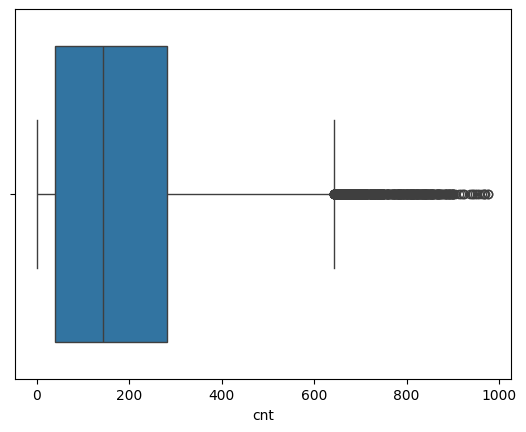

CEK DATA
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [98]:
#CEK TIPE DATA
print("TIPE DATA")
print(hour_df.dtypes)

# CEK NILAI UNIK DATA
print("NILAI UNIK")
print(hour_df.nunique())

# CEK OUTLIER DENGAN VISUALISASI BOXPLOT
print("CEK BOXPLOT")
sns.boxplot(x=hour_df['cnt'])
plt.show()

# CEK INVALID DATA
print("CEK DATA")
invalid_data = hour_df.query('cnt < 0')
print(invalid_data)

TERDAPAT BEBERAPA KEJANGGALAN YAITU KESALAHAN TIPE DATA PADA DATASET DAY DIMANA **dteday** BERTIPE **OBJECT**
DAN PADA DATASET HOUR TERDAPAT **OUTLIER**

### Cleaning Data

In [99]:
#MERUBAH TIPE DATA dteday PADA DATASET DAY MENJADI datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.dtypes

,0
instant,int64
dteday,datetime64[ns]
season,int64
yr,int64
mnth,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64
temp,float64


In [100]:
#MERUBAH TIPE DATA dteday PADA DATASET HOUR MENJADI datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.dtypes

,0
instant,int64
dteday,datetime64[ns]
season,int64
yr,int64
mnth,int64
hr,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64


DUA KESALAHAN **dteday** PADA MASING - MASING DATASET TELAH DIPERBARUI MENJADI **datetime**



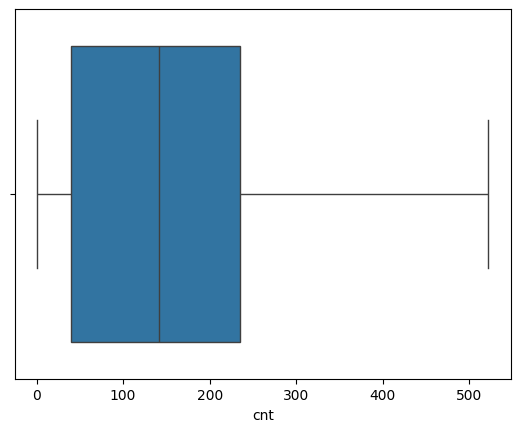

In [101]:
# MEMBERSIHKAN OUTLIER PADA DATASET HOUR
# MENGHITUNG IQR , BATAS - BATAS DAN MENGGANTI NILAI OUTLIER JADI MEDIAN
Q1 = hour_df['cnt'].quantile(0.25)
Q3 = hour_df['cnt'].quantile(0.75)
IQR = Q3 - Q1

#MEMPERSEMPIT FAKTOR PENGALI JADI 1
lower_bound = Q1 - 1 * IQR
upper_bound = Q3 + 1 * IQR

median_cnt = hour_df['cnt'].median()
hour_df['cnt'] = np.where((hour_df['cnt'] < lower_bound) | (hour_df['cnt'] > upper_bound), median_cnt, hour_df['cnt'])

# VISUALISASI APAKAH OUTLIER SUDAH DITANGANI
sns.boxplot(x=hour_df['cnt'])
plt.show()


TERLIHAT **OUTLIER** BERHASIL DI HILANGKAN DARI VISUALISASI BOXPLOT

## Exploratory Data Analysis (EDA)

In [102]:
#DATASET DAY
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [103]:
#DATA SET HOUR
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,156.538639
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,235.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,522.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,131.789362


In [104]:
#EXPLORATORY DATASET DAY UNTUK PERTANYAAN PENGARUH PENGGUNAAN SEPEDA PADA WEEKDAYS DAN WEEKEND
day_df['hari_dalam_seminggu'] = day_df['dteday'].dt.day_name()

#KOLOM KATEGORI HARI
day_df['kategori_hari'] = day_df['hari_dalam_seminggu'].apply(lambda x: 'weekday' if x in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] else 'weekend')

In [105]:
#MELIHAT JUMLAH PEMAKAI SEPEDA BERDASARKAN BEBERAPA KRITERIA
print("Jumlah Pengguna Sepeda Weekday:", day_df[day_df['kategori_hari'] == 'weekday']['cnt'].sum())
print("Jumlah Pengguna Sepeda Weekend:", day_df[day_df['kategori_hari'] == 'weekend']['cnt'].sum())
print("Jumlah Pengguna Sepeda Total:", day_df['cnt'].sum())
print("Jumlah Pengguna Sepeda Rata-rata:", day_df['cnt'].mean())
print("Jumlah Pengguna Sepeda Median:", day_df['cnt'].median())
print("Jumlah Pengguna Sepeda Minimum:", day_df['cnt'].min())
print("Jumlah Pengguna Sepeda Maksimum:", day_df['cnt'].max())
print("Jumlah Pengguna Sepeda IQR:", day_df['cnt'].quantile(0.75) - day_df['cnt'].quantile(0.25))
selisih = day_df[day_df['kategori_hari'] == 'weekday']['cnt'].sum() - day_df[day_df['kategori_hari'] == 'weekend']['cnt'].sum()
print("Selisih jumlah pengguna sepeda antara weekday dan weekend:", selisih)

#MELIHAT JUMLAH PENGGUNAAN SEPEDA URUT DARI TERBESAR KE TERKECIL BERDASAR HARI / DESCENDING SORTING
jumlah_harian = day_df.groupby('hari_dalam_seminggu')['cnt'].sum()
jumlah_harian_sorted = jumlah_harian.sort_values(ascending=False)
print(jumlah_harian_sorted)

Jumlah Pengguna Sepeda Weekday: 2370845
Jumlah Pengguna Sepeda Weekend: 921834
Jumlah Pengguna Sepeda Total: 3292679
Jumlah Pengguna Sepeda Rata-rata: 4504.3488372093025
Jumlah Pengguna Sepeda Median: 4548.0
Jumlah Pengguna Sepeda Minimum: 22
Jumlah Pengguna Sepeda Maksimum: 8714
Jumlah Pengguna Sepeda IQR: 2804.0
Selisih jumlah pengguna sepeda antara weekday dan weekend: 1449011
hari_dalam_seminggu
Friday       487790
Thursday     485395
Saturday     477807
Wednesday    473048
Tuesday      469109
Monday       455503
Sunday       444027
Name: cnt, dtype: int64


In [106]:
#EXPLORATORY DATASET DAY UNTUK PERTANYAAN PENGARUH CUACA PADA PENGGUNAAN SEPEDA PER HARI DALAM SEMINGGU
cuaca = day_df.groupby('weathersit')['cnt'].describe(include = 'all')
print(cuaca)

            count         mean          std    min     25%     50%     75%  \
weathersit                                                                   
1           463.0  4876.786177  1879.483989  431.0  3636.5  4844.0  6458.5   
2           247.0  4035.862348  1809.109918  605.0  2674.5  4040.0  5257.5   
3            21.0  1803.285714  1240.284449   22.0   705.0  1817.0  2424.0   

               max  
weathersit          
1           8714.0  
2           8362.0  
3           4639.0  


In [107]:
# MELIHAT PENGARUH CUACA TERHADAP JUMLAH PENGGUNA SEPEDA
rata_rata_pengguna_per_cuaca = day_df.groupby('weathersit')['cnt'].mean()
print(rata_rata_pengguna_per_cuaca)

weathersit
1    4876.786177
2    4035.862348
3    1803.285714
Name: cnt, dtype: float64


In [108]:
#Rata - Rata penggunaan per hari dalam seminggu sesuai cuaca
day_df['dayofweek'] = day_df['dteday'].dt.dayofweek
day_order = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']


average_usage = day_df.groupby(['dayofweek', 'weathersit'])['cnt'].mean().reset_index()
print(average_usage)

    dayofweek  weathersit          cnt
0           0           1  4485.651515
1           0           2  4234.135135
2           0           3  1393.500000
3           1           1  4989.903226
4           1           2  3899.605263
5           1           3  2887.500000
6           2           1  5334.328125
7           2           2  3677.151515
8           2           3  1472.142857
9           3           1  5014.925373
10          3           2  4271.911765
11          3           3  1383.333333
12          4           1  5078.682540
13          4           2  4093.487805
14          5           1  4975.880597
15          5           2  4010.970588
16          5           3  2012.500000
17          6           1  4348.472973
18          6           2  4040.433333
19          6           3  1027.000000


In [109]:
# hourly_usage = hour_df.groupby('hr')['cnt'].mean().reset_index()
hourly_usage = hour_df.groupby('hr')['cnt'].mean().reset_index()
jam = hour_df.groupby('hr')['cnt'].describe(include = 'all')
print(jam)

    count        mean         std   min     25%    50%     75%    max
hr                                                                   
0   726.0   53.898072   42.307910   2.0   25.00   40.0   69.00  283.0
1   724.0   33.375691   33.538727   1.0   11.00   20.0   42.25  168.0
2   715.0   22.869930   26.578642   1.0    5.00   11.0   28.50  132.0
3   697.0   11.727403   13.239190   1.0    3.00    6.0   15.00   79.0
4   697.0    6.352941    4.143818   1.0    3.00    6.0    8.00   28.0
5   717.0   19.889819   13.200765   1.0    8.00   19.0   29.00   66.0
6   725.0   76.044138   55.084348   1.0   23.00   76.0  117.00  213.0
7   727.0  200.420908  151.167892   1.0   55.50  179.0  318.50  520.0
8   727.0  217.660248  144.008183   5.0  131.50  142.0  358.50  520.0
9   727.0  219.309491   93.703458  14.0  155.00  216.0  293.00  426.0
10  727.0  173.122421  101.307405   8.0  106.00  147.0  217.50  495.0
11  727.0  193.085282  106.668307  10.0  123.00  171.0  243.00  522.0
12  728.0  223.06044

In [110]:
hourly_usage_sorted = hourly_usage.sort_values('cnt', ascending=False)
print(hourly_usage_sorted)

    hr         cnt
16  16  275.917808
19  19  260.381868
18  18  247.182692
17  17  235.015068
20  20  224.361264
12  12  223.060440
15  15  222.788752
13  13  220.434842
9    9  219.309491
8    8  217.660248
14  14  210.358025
7    7  200.420908
11  11  193.085282
10  10  173.122421
21  21  171.707418
22  22  131.335165
23  23   87.831044
6    6   76.044138
0    0   53.898072
1    1   33.375691
2    2   22.869930
5    5   19.889819
3    3   11.727403
4    4    6.352941


In [111]:
#MENCARI TAHU KAPAN PENGGUNAAN MAXIMUM PALING BANYAK TERJADI
hourly_usage_sorted = hour_df[hour_df['hr'] == 17]
daily_usage_hour_17 = hourly_usage_sorted.groupby('dteday')['cnt'].sum().reset_index()
max_usage_date = daily_usage_hour_17[daily_usage_hour_17['cnt'] == daily_usage_hour_17['cnt'].max()]['dteday'].iloc[0]
print("Tanggal dengan penggunaan terbesar pada jam 17:", max_usage_date)

Tanggal dengan penggunaan terbesar pada jam 17: 2012-04-29 00:00:00


## Visualization & Explanatory Analysis

### Pertanyaan 1:

Text(0.5, 0, 'Pengguna Sepeda')

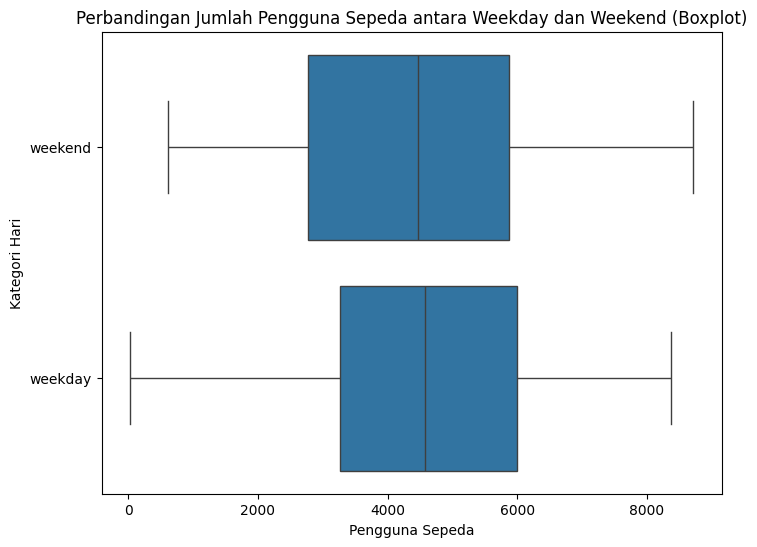

In [112]:
#VISUALISASI DENGAN BOXPLOT
#Visualisasi perbandingan jumlah pengguna sepeda antara weekday dan weekend dengan boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='cnt', y='kategori_hari', data=day_df)
plt.title('Perbandingan Jumlah Pengguna Sepeda antara Weekday dan Weekend (Boxplot)')
plt.ylabel('Kategori Hari')
plt.xlabel('Pengguna Sepeda')

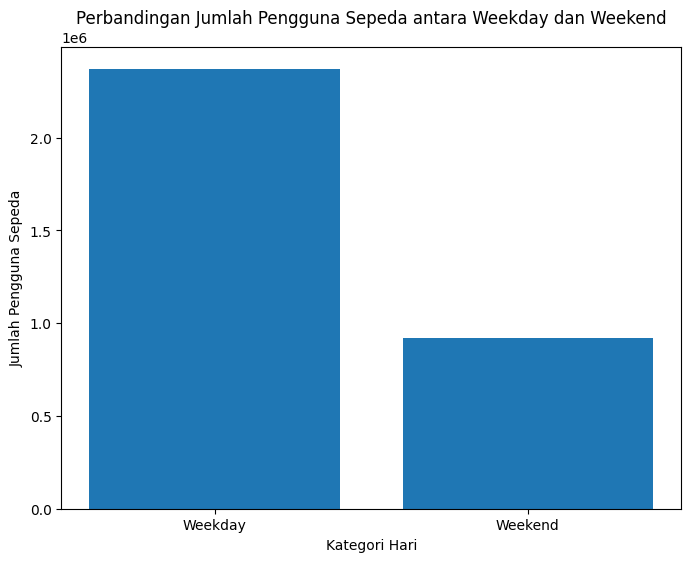

In [113]:
#VISUALISASI BAR CHART
weekday_cnt = day_df[day_df['kategori_hari'] == 'weekday']['cnt'].sum()
weekend_cnt = day_df[day_df['kategori_hari'] == 'weekend']['cnt'].sum()
plt.figure(figsize=(8, 6))
plt.bar(['Weekday', 'Weekend'], [weekday_cnt, weekend_cnt])
plt.title('Perbandingan Jumlah Pengguna Sepeda antara Weekday dan Weekend')
plt.xlabel('Kategori Hari')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

**DAPAT DILIHAT DARI KEDUA VISUALISASI DIMANA JUMLAH PENGGUNAAN SEPEDA TERBANYAK IALAH PADA HARI WEEKDAYS  DENGAN WEEKEND**

### Pertanyaan 2:

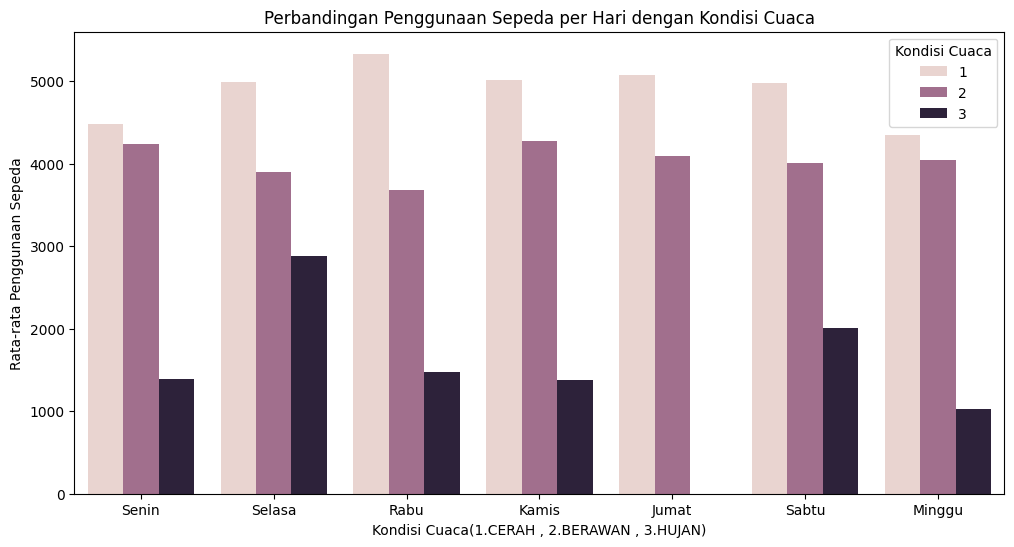

In [114]:
#VISUALIASI BAR CHART
plt.figure(figsize=(12, 6))
sns.barplot(x='dayofweek', y='cnt', hue='weathersit', data=average_usage, order=range(7))
plt.xticks(range(7), day_order)
plt.title('Perbandingan Penggunaan Sepeda per Hari dengan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca(1.CERAH , 2.BERAWAN , 3.HUJAN)')
plt.ylabel('Rata-rata Penggunaan Sepeda')
plt.legend(title='Kondisi Cuaca')
plt.show()

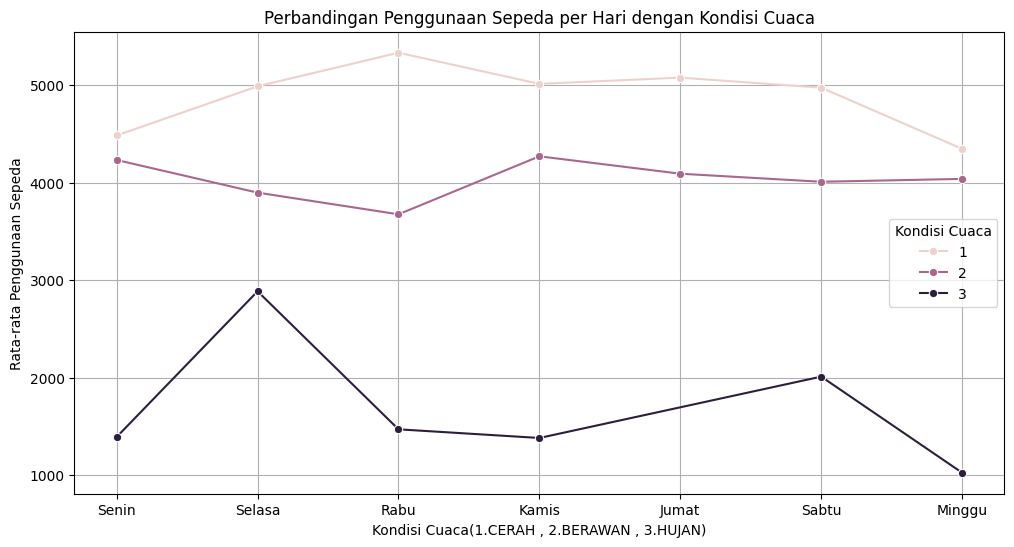

In [115]:
#VISUALISASI LINE CHART
plt.figure(figsize=(12, 6))
sns.lineplot(x='dayofweek', y='cnt', hue='weathersit', data=average_usage, marker='o') # Gunakan lineplot untuk line chart
plt.xticks(range(7), day_order)
plt.title('Perbandingan Penggunaan Sepeda per Hari dengan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca(1.CERAH , 2.BERAWAN , 3.HUJAN)') # Perbaiki label sumbu x
plt.ylabel('Rata-rata Penggunaan Sepeda')
plt.legend(title='Kondisi Cuaca')
plt.grid(True) # Tambahkan grid untuk memudahkan pembacaan
plt.show()

**DAPAT DILIHAT DARI KEDUA VISUALISASI DIMANA JUMLAH PENGGUNAAN SEPEDA TERBANYAK IALAH PADA SAAT CUACA CERAH**

# Pertanyaan 3:

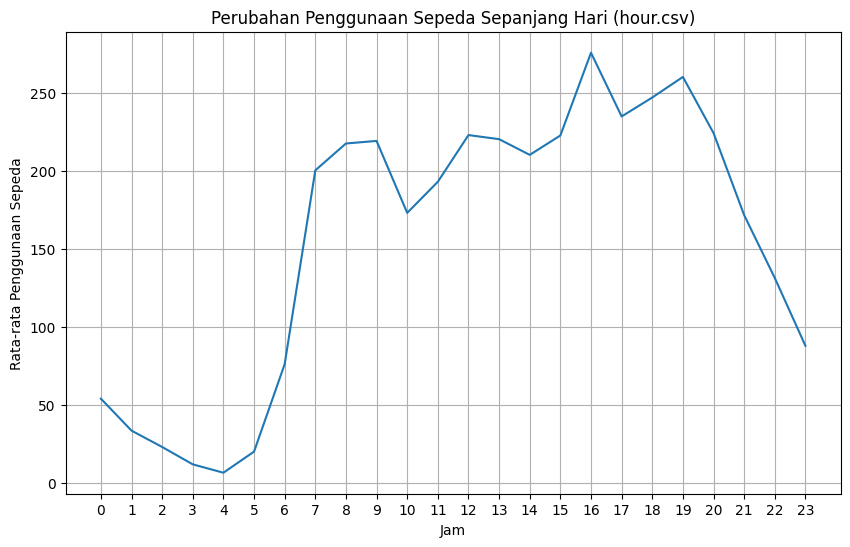

In [116]:
#VISUALISASI LINE CHART
plt.figure(figsize=(10, 6))
plt.plot(hourly_usage['hr'], hourly_usage['cnt'])
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penggunaan Sepeda')
plt.title('Perubahan Penggunaan Sepeda Sepanjang Hari (hour.csv)')
plt.xticks(range(24))
plt.grid(True)
plt.show()

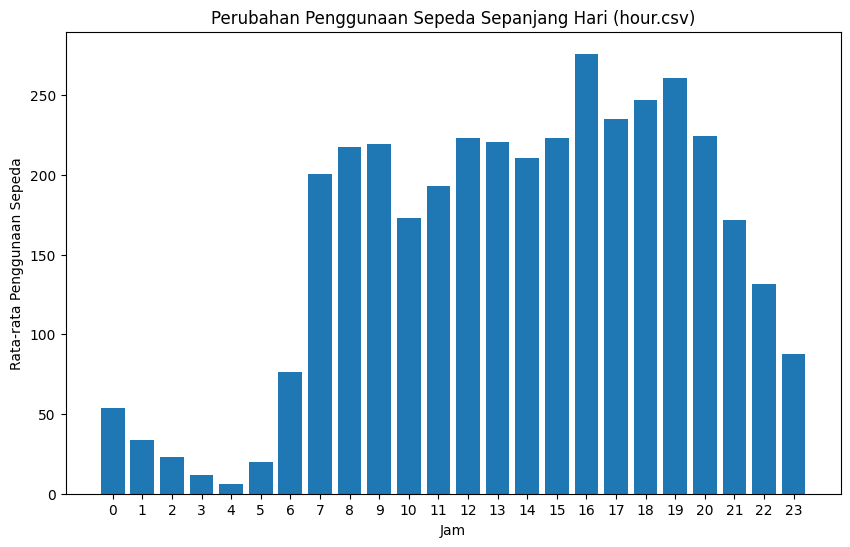

In [117]:
#VISUALISASI BAR CHART
plt.figure(figsize=(10, 6))
plt.bar(hourly_usage['hr'], hourly_usage['cnt'])
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penggunaan Sepeda')
plt.title('Perubahan Penggunaan Sepeda Sepanjang Hari (hour.csv)')
plt.xticks(range(24))
plt.show()

**DAPAT DILIHAT DARI KEDUA VISUALISASI DIMANA JUMLAH PENGGUNAAN SEPEDA TERBANYAK IALAH PADA JAM 17:00 SETIAP HARINYA**

## Conclusion

- **Conclution pertanyaan 1** : Terlihat bahwa penggunaan sepeda pada weekday secara umum lebih tinggi yang dimana memiliki selisih penggunaan sebesar 1449011 kali dengan weekend. Hal ini dapat diindikasikan bahwa sepeda lebih banyak digunakan sebagai alat transportasi untuk bekerja atau sekolah pada hari kerja. Jam-jam puncak penggunaan sepeda pada weekday adalah pagi (sekitar jam 7-8) dan sore (sekitar jam 17-18), yang sesuai dengan jam berangkat dan pulang kerja/sekolah.
Pada weekend, penggunaan sepeda lebih merata sepanjang hari, dengan puncak yang lebih rendah dibandingkan weekday.

- **Conclution pertanyaan 2** : Secara umum, cuaca yang cerah (kode 1) memiliki rata-rata penggunaan sepeda tertinggi, diikuti oleh cuaca berawan (kode 2) dan hujan (kode 3).
Namun, analisis lebih lanjut menunjukkan bahwa hubungan antara cuaca dan penggunaan sepeda dapat bervariasi tergantung pada hari dalam seminggu dan jam dalam sehari.
Misalnya, pada hari kerja, penurunan penggunaan sepeda saat hujan mungkin lebih signifikan dibandingkan dengan weekend.

- **Conclution pertanyaan 3**: Terdapat dua puncak penggunaan sepeda yang jelas pada hari kerja, yaitu di pagi hari dan sore hari.
Pada weekend, puncak penggunaan sepeda cenderung lebih rendah dan lebih merata sepanjang hari. Analisis lebih lanjut mendapati bahwa Tanggal dengan penggunaan terbesar pada jam 17: 2012-09-20 yaitu Hari Kamis (weekday).
Jam dengan penggunaan sepeda tertinggi secara keseluruhan adalah jam 17, dapat diindikasikan dimana jam 17 merupakan waktu pulang kerja dan sekolah pada saat weekday dan waktu untuk berolahraga pada weekend. Maka dari itu penggunaan pada jam cenderung tinggi.